In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
train_image_files_path="/content/drive/My Drive/AmazonGo/Data/Train/"
valid_image_files_path="/content/drive/My Drive/AmazonGo/Data/Validation/"

In [ ]:
label=['BanhMy','BiaNuocNgot','HoaQua','Rau']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255) #đọc và chuẩn hóa dữ liệu ảnh về 0-1
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,      #Đường dẫn tới ảnh huấn luyện
    target_size=(150, 150),      #Biến đổi các ảnh huấn luyện về cùng một kích thước [150x150]
    class_mode='categorical')    #Phân loại ảnh đa lớp (4 lớp)
validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(150, 150),
    class_mode='categorical')

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

#lớp CNN1
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
#lớp CNN2
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#lớp CNN3
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#lớp CNN4
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#lớp CNN5
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#Chuyển đầu ra dữ liệu của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten())
#lớp bỏ qua nhằm tăng hiệu quả của mạng nowrron, loại bỏ ngẫu nhiên một số nơron
model.add(Dropout(0.5))
#lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))
#lớp output
model.add(Dense(4, activation=tf.nn.softmax)) #4 đầu ra 

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.summary()
EPOCHS=150
history=model.fit(
    train_generator,
    steps_per_epoch=2,
    epochs=EPOCHS,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [ ]:
model.save("rps")

INFO:tensorflow:Assets written to: rps/assets


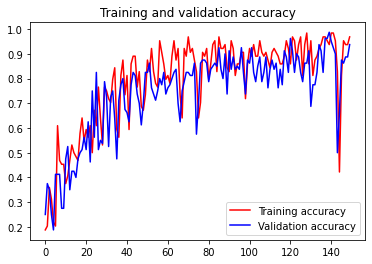

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

uploaded=files.upload()

for fn in uploaded.keys():
  #Dự đoán hình ảnh
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict =  model.predict(images,batch_size=10)
  print(y_predict)
  print('giá trị dự đoán: ',label[np.argmax(y_predict)])

TypeError: ignored